# Movie Recommendation System


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('movie.csv')

In [39]:
df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
df.shape

(9742, 3)

In [41]:
df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [42]:
#extract title function
def extracting_title(title):
    year = title[len(title)-5:len(title)-1]
    
    if year.isnumeric():
        title_no_year=title[:len(title)-7]
        return title_no_year
    else:
        return title

In [43]:
#extract year function
def extracting_year(title):
    year = title[len(title)-5:len(title)-1]
    
    if year.isnumeric():
        return int(year)
    else:
        return np.nan

In [44]:
df.rename(columns={'title':'title_year'}, inplace=True)
df['title_year']=df['title_year'].apply(lambda x:x.strip())
df['title']=df['title_year'].apply(extracting_title)
df['year']=df['title_year'].apply(extracting_year)

In [45]:
df

,movieId,title_year,genres,title,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,No Game No Life: Zero,2017.0
9739,193585,Flint (2017),Drama,Flint,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,Bungo Stray Dogs: Dead Apple,2018.0


In [46]:
df.isnull().sum()

movieId        0
title_year     0
genres         0
title          0
year          12
dtype: int64

# Exploring Generes

In [47]:
r,c = df[df['genres']=='(no genres listed)'].shape 
print('The number of movies which do not have info about genres:',r)

The number of movies which do not have info about genres: 34


In [48]:
df = df[~(df['genres']=='(no genres listed)')].reset_index(drop=True)

In [49]:
df[['title','genres']].head(5)

,title,genres
0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji,Adventure|Children|Fantasy
2,Grumpier Old Men,Comedy|Romance
3,Waiting to Exhale,Comedy|Drama|Romance
4,Father of the Bride Part II,Comedy


In [50]:
df['genres'] = df['genres'].str.replace('|',' ')

<ipython-input-50-4bbd5e4c14c8>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genres'] = df['genres'].str.replace('|',' ')


In [51]:
df

,movieId,title_year,genres,title,year
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,Toy Story,1995.0
1,2,Jumanji (1995),Adventure Children Fantasy,Jumanji,1995.0
2,3,Grumpier Old Men (1995),Comedy Romance,Grumpier Old Men,1995.0
3,4,Waiting to Exhale (1995),Comedy Drama Romance,Waiting to Exhale,1995.0
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995.0
...,...,...,...,...,...
9703,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,Black Butler: Book of the Atlantic,2017.0
9704,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,No Game No Life: Zero,2017.0
9705,193585,Flint (2017),Drama,Flint,2017.0
9706,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,Bungo Stray Dogs: Dead Apple,2018.0


In [52]:
counts=dict()

for i in df.index:
    for g in df.loc[i,'genres'].split(' '):
        if g not in counts:
            counts[g]=1
        else:
            counts[g]=counts[g]+1
        

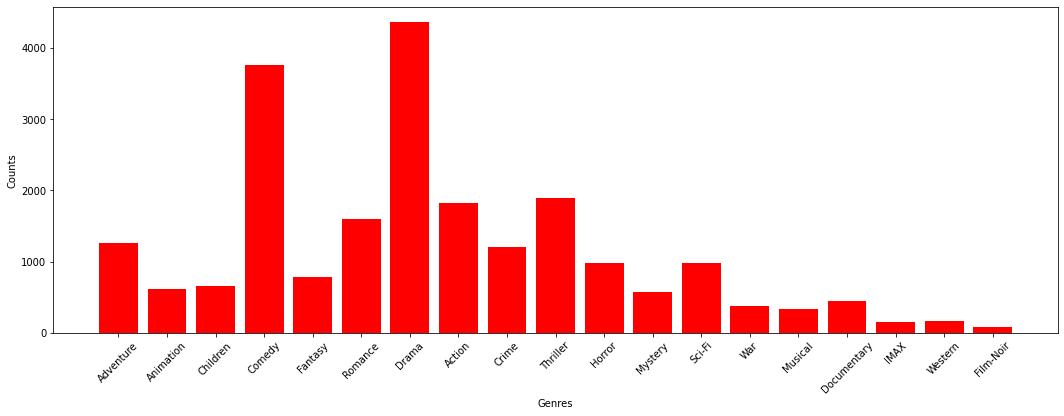

In [53]:
plt.figure(figsize=(18,6))
plt.bar(list(counts.keys()),counts.values(),color='r')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.show()

# Term Frequency and Inverse Document Frequency (tf-idf)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
df['genres']=df['genres'].str.replace('Sci-fi','Scifi')
df['genres']=df['genres'].str.replace('Film-Noir','Noir')

In [56]:
tfidf_vector=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf_vector.fit_transform(df['genres'])

In [57]:
print(list(enumerate(tfidf_vector.get_feature_names())))

[(0, 'action'), (1, 'adventure'), (2, 'animation'), (3, 'children'), (4, 'comedy'), (5, 'crime'), (6, 'documentary'), (7, 'drama'), (8, 'fantasy'), (9, 'fi'), (10, 'horror'), (11, 'imax'), (12, 'musical'), (13, 'mystery'), (14, 'noir'), (15, 'romance'), (16, 'sci'), (17, 'thriller'), (18, 'war'), (19, 'western')]


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
print(tfidf_matrix[:5])

  (0, 8)	0.48301747178653426
  (0, 4)	0.26738777563975086
  (0, 3)	0.5048957307474672
  (0, 2)	0.5162876752057701
  (0, 1)	0.41680359510322523
  (1, 8)	0.5936766667075072
  (1, 3)	0.6205672299106341
  (1, 1)	0.5122932056626417
  (2, 15)	0.8211549883098352
  (2, 4)	0.5707052524498741
  (3, 7)	0.46621627821471856
  (3, 15)	0.7264518207332316
  (3, 4)	0.5048862585582906
  (4, 4)	1.0


In [59]:
tfidf_matrix.shape

(9708, 20)

In [60]:
tfidf_matrix.todense()[0]

matrix([[0.        , 0.4168036 , 0.51628768, 0.50489573, 0.26738778,
         0.        , 0.        , 0.        , 0.48301747, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

In [61]:
from sklearn.metrics.pairwise import linear_kernel

In [62]:
sim_matrix=linear_kernel(tfidf_matrix,tfidf_matrix)
print(sim_matrix)

[[1.         0.8136036  0.15259961 ... 0.         0.42114166 0.26738778]
 [0.8136036  1.         0.         ... 0.         0.         0.        ]
 [0.15259961 0.         1.         ... 0.         0.         0.57070525]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.42114166 0.         0.         ... 0.         1.         0.        ]
 [0.26738778 0.         0.57070525 ... 0.         0.         1.        ]]


# Make the Recommendation Engine

In [63]:
def get_title_year_from_index(index):
    return df[df.index==index]['title_year'].values[0]

def get_index_from_title(title):
    return df[df.title==title].index.values[0]

In [64]:
from fuzzywuzzy import fuzz

In [65]:
def matching_score(a,b):
    return fuzz.ratio(a,b)

In [66]:
def get_title_from_index(index):
    return df[df.index==index]['title'].values[0]

In [67]:
def find_closest_title(title):
    leven_scores = list(enumerate(df['title'].apply(matching_score, b=title)))
    sorted_leven_scores = sorted(leven_scores, key=lambda x: x[1], reverse=True)
    closest_title = get_title_from_index(sorted_leven_scores[0][0])
    distance_score = sorted_leven_scores[0][1]
    return closest_title, distance_score

# Recommend Movie

In [68]:
def contents_based_recommender(movie_user_likes, how_many):
    closest_title, distance_score = find_closest_title(movie_user_likes)
    if distance_score == 100:
        movie_index = get_index_from_title(closest_title)
        movie_list = list(enumerate(sim_matrix[int(movie_index)]))
        similar_movies = list(filter(lambda x:x[0] != int(movie_index), sorted(movie_list,key=lambda x:x[1], reverse=True))) # remove the typed movie itself

        print('Here\'s the list of movies similar to '+'\033[1m'+str(closest_title)+'\033[0m'+'.\n')

    for i,s in similar_movies[:how_many]: 
        print(get_title_year_from_index(i))
    

In [69]:
contents_based_recommender('Toy Story',20)

Here's the list of movies similar to Toy Story.

Antz (1998)
Toy Story 2 (1999)
Adventures of Rocky and Bullwinkle, The (2000)
Emperor's New Groove, The (2000)
Monsters, Inc. (2001)
Wild, The (2006)
Shrek the Third (2007)
Tale of Despereaux, The (2008)
Asterix and the Vikings (Astérix et les Vikings) (2006)
Turbo (2013)
The Good Dinosaur (2015)
Moana (2016)
Inside Out (2015)
Black Cauldron, The (1985)
Lord of the Rings, The (1978)
We're Back! A Dinosaur's Story (1993)
Atlantis: The Lost Empire (2001)
Land Before Time, The (1988)
Pokemon 4 Ever (a.k.a. Pokémon 4: The Movie) (2002)
Sinbad: Legend of the Seven Seas (2003)


In [70]:
df[df["title"]=="Iron Man"]

,movieId,title_year,genres,title,year
6743,59315,Iron Man (2008),Action Adventure Sci-Fi,Iron Man,2008.0
9424,167296,Iron Man (1931),Drama,Iron Man,1931.0


In [71]:
contents_based_recommender("Iron Man",5)

Here's the list of movies similar to Iron Man.

Waterworld (1995)
Star Wars: Episode IV - A New Hope (1977)
Stargate (1994)
Demolition Man (1993)
Star Wars: Episode V - The Empire Strikes Back (1980)
